In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
DF_Netflix = pd.read_csv(r'Netflix Userbase.csv.')
DF_Netflix

,Unnamed: 0,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,date,year,month,day
0,0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,2022-01-15,2022,1,15
1,1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,2021-05-09,2021,5,9
2,2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28,2023,2,28
3,3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,2022-10-07,2022,10,7
4,4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,2023-01-05,2023,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,2022-07-25,2022,7,25
2496,2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,2022-04-08,2022,4,8
2497,2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,2022-09-08,2022,9,8
2498,2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,2022-12-08,2022,12,8


In [4]:
DF_Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
DF_Netflix.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [6]:
DF_Netflix.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [7]:
DF_Netflix.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [9]:
monthly_revenue_by_plan = DF_Netflix.groupby("Subscription Type")["Monthly Revenue"].mean()
monthly_revenue_by_plan

Subscription Type
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: Monthly Revenue, dtype: float64

In [15]:
country_counts = DF_Netflix['Country'].value_counts().sort_values(ascending=False)
country_counts

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [17]:
DF_Netflix['Device'].value_counts().sort_values(ascending=False)

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

In [36]:
DF_Netflix['Monthly Revenue'].value_counts().sort_values(ascending=False)

Monthly Revenue
12    455
14    431
13    418
10    409
15    399
11    388
Name: count, dtype: int64

In [21]:
DF_Netflix['date'] = pd.to_datetime(DF_Netflix['Join Date'])

DF_Netflix['year'] = DF_Netflix['date'].dt.year
DF_Netflix['month'] = DF_Netflix['date'].dt.month
DF_Netflix['day'] = DF_Netflix['date'].dt.day

C:\Users\omars\AppData\Local\Temp\ipykernel_10540\3837565436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DF_Netflix['date'] = pd.to_datetime(DF_Netflix['Join Date'])


In [22]:
DF_Netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,date,year,month,day
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,2022-01-15,2022,1,15
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,2021-05-09,2021,5,9
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28,2023,2,28
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,2022-10-07,2022,10,7
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,2023-01-05,2023,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,2022-07-25,2022,7,25
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,2022-04-08,2022,4,8
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,2022-09-08,2022,9,8
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,2022-12-08,2022,12,8


<Axes: xlabel='Device', ylabel='count'>

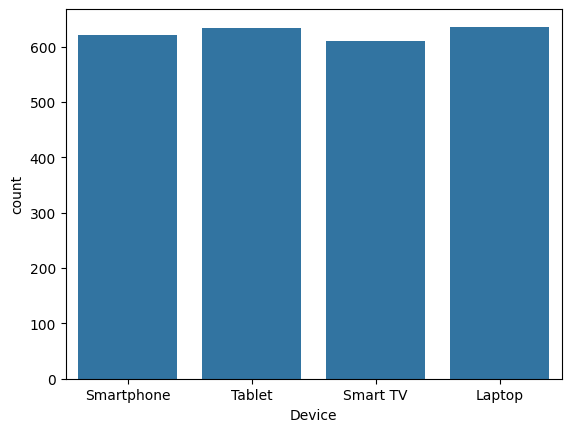

In [27]:
sns.countplot(data=DF_Netflix , x = 'Device')

In [33]:
DF_Netflix.to_csv('Netflix-Data.csv.')

In [34]:
DF_Netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,date,year,month,day
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,2022-01-15,2022,1,15
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,2021-05-09,2021,5,9
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2023-02-28,2023,2,28
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,2022-10-07,2022,10,7
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,2023-01-05,2023,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,2022-07-25,2022,7,25
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,2022-04-08,2022,4,8
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,2022-09-08,2022,9,8
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,2022-12-08,2022,12,8


In [40]:
DF_Netflix['User ID'].duplicated().sum()

0

In [42]:
DF_Netflix['User ID'].count()

2500